In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> 1. Create a DataFrame with the collected data using pandas: </h2>

In [25]:
df = pd.read_csv('job-data-update.csv')
df.head(5)

,joining_date,job_title,required_experience,Salary,Industary_Sector,Demanding_Of_the_Job,Overall_Satisfication,Working_model,Considering_Job_Switching_in_Future,Main_Reasons
0,12/10/2023,Junior Software Developer (Backend),Fresh graduate,19000,Technology,Increasing,Satisfied,On Site,No,I am happy with my work role
1,03/01/2022,Data Scientist,More than 2 years,50000,environmental engineering,Stable,Satisfied,Remote,Yes,Better salary/benefits
2,02/06/2022,Data Scientist,More than 2 years,115000,Travel and Tourism,Stable,Satisfied,On Site,Yes,"Career Development, Salary andBenefits"
3,01/03/2021,Senior Software Engineer (Backend),More than 2 years,200000,Technology,Increasing,Very Satisfied,On Site,No,I am happy with my work role
4,03/08/2021,Software Developer (Backend),More than 2 years,47000,Finance,Stable,Satisfied,On Site,Yes,Seeking better work-life balance


<h2>2. Please describe the information regarding data using pandas. </h2>

In [26]:
df.describe()

,Salary
count,249.000000
mean,64898.594378
std,42013.546779
min,5000.000000
25%,35000.000000
50%,55000.000000
75%,85000.000000
max,200000.000000


<h2>3. Conduct the cleaning on the data: </h2>

In [27]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


duplicates = df.duplicated().sum()
print("Duplicate rows:")
print(duplicates)


Missing values:
joining_date                           0
job_title                              0
required_experience                    0
Salary                                 0
Industary_Sector                       0
Demanding_Of_the_Job                   0
Overall_Satisfication                  0
Working_model                          0
Considering_Job_Switching_in_Future    0
Main_Reasons                           0
dtype: int64
Duplicate rows:
0


<h2>4. Organize the data into a JSON file and then read this JSON data: </h2>

In [28]:
# CSV to JSON

json_data = df.to_json('job-data.json', orient='records', lines=True)

In [29]:
# JSON to CSV

df_from_json = pd.read_json('job-data.json', orient='records', lines=True)
df_from_json.to_csv('job-data-from-json.csv', index=False)
dff = pd.read_csv('job-data-from-json.csv')
dff.head(4)

<h2>5. Do you think scaling is necessary in this case? Justify </h2>

Yes, Scaling might be necessary depending on the range and distribution of the numerical features like Salary. If the salary ranges are vastly different, scaling would be necessary to ensure fair comparison and accurate analysis.

<h3>6. Develop necessary hypothesis that might support your understanding on the developed datasets: </h3>

**Hypothesis 1:** Employees in the technology sector might have higher salaries compared to other sectors. <br>
**Hypothesis 2:** Employees with more experience tend to have higher salaries. <br>
**Hypothesis 3:** Job satisfaction might correlate with the likelihood of considering job switching.

<h2 style="color:green">7. Calculate the relationship between each column in your data set:</h2>


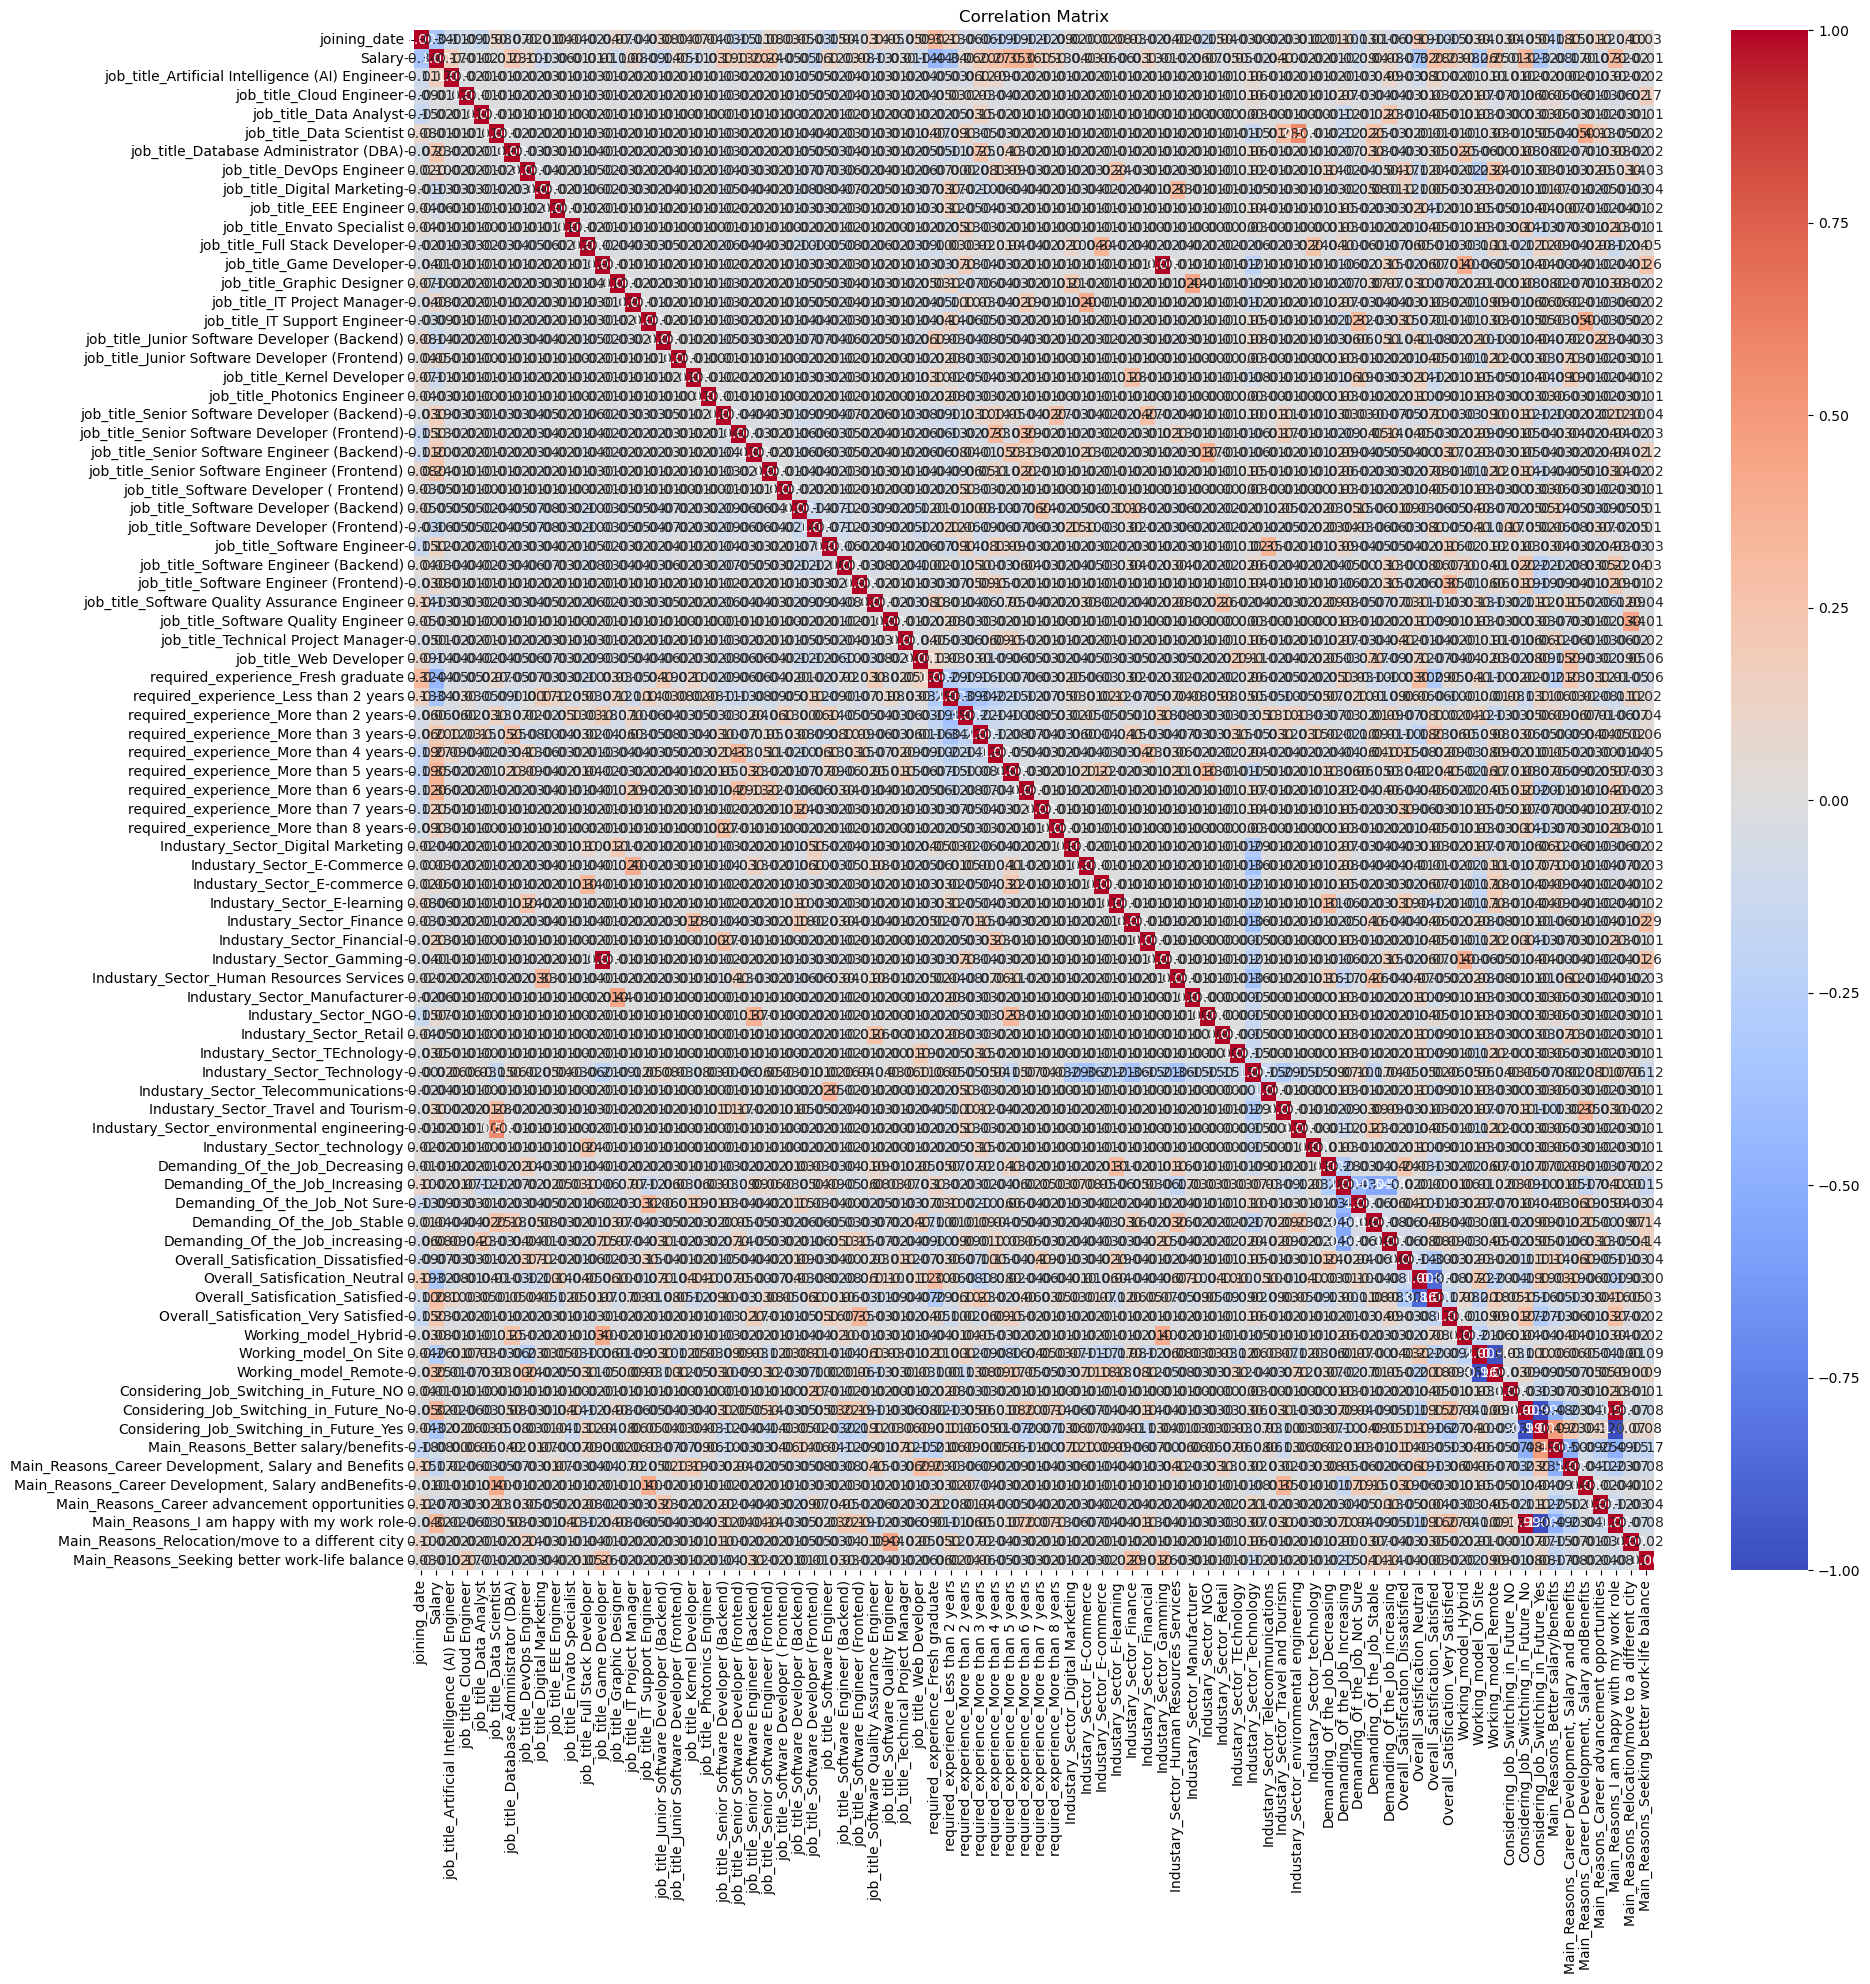

In [49]:
# Convert 'joining_date' column to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'])

# One-hot encode categorical columns
categorical_columns = ['job_title', 'required_experience', 'Industary_Sector', 'Demanding_Of_the_Job', 'Overall_Satisfication', 'Working_model', 'Considering_Job_Switching_in_Future', 'Main_Reasons']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [50]:
correlation_matrix

,joining_date,Salary,job_title_Artificial Intelligence (AI) Engineer,job_title_Cloud Engineer,job_title_Data Analyst,job_title_Data Scientist,job_title_Database Administrator (DBA),job_title_DevOps Engineer,job_title_Digital Marketing,job_title_EEE Engineer,...,Considering_Job_Switching_in_Future_NO,Considering_Job_Switching_in_Future_No,Considering_Job_Switching_in_Future_Yes,Main_Reasons_Better salary/benefits,"Main_Reasons_Career Development, Salary and Benefits","Main_Reasons_Career Development, Salary andBenefits",Main_Reasons_Career advancement opportunities,Main_Reasons_I am happy with my work role,Main_Reasons_Relocation/move to a different city,Main_Reasons_Seeking better work-life balance
joining_date,1.000000,-0.339331,-0.107493,-0.093525,-0.149855,0.082134,-0.073719,0.015453,-0.006715,0.042908,...,0.043455,-0.047278,0.039795,-0.181034,0.150443,-0.014110,0.123815,-0.039795,0.101072,0.033965
Salary,-0.339331,1.000000,0.167917,-0.011119,-0.022563,-0.008073,0.232504,0.095494,-0.131385,-0.062019,...,0.007726,0.324112,-0.322617,-0.082218,-0.167603,0.005583,-0.065834,0.322617,-0.020480,-0.005963
job_title_Artificial Intelligence (AI) Engineer,-0.107493,0.167917,1.000000,-0.016327,-0.008114,-0.014110,-0.018291,-0.023280,-0.028752,-0.011498,...,-0.008114,0.023005,-0.021487,-0.003593,0.019998,-0.011498,-0.031187,0.021487,-0.018291,-0.021731
job_title_Cloud Engineer,-0.093525,-0.011119,-0.016327,1.000000,-0.008114,-0.014110,-0.018291,-0.023280,-0.028752,-0.011498,...,-0.008114,-0.060012,0.060824,0.060319,-0.061634,-0.011498,-0.031187,-0.060824,-0.018291,0.171523
job_title_Data Analyst,-0.149855,-0.022563,-0.008114,-0.008114,1.000000,-0.007012,-0.009090,-0.011569,-0.014289,-0.005714,...,-0.004032,-0.029824,0.030228,0.061739,-0.030630,-0.005714,-0.015499,-0.030228,-0.009090,-0.010800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Main_Reasons_Career Development, Salary andBenefits",-0.014110,0.005583,-0.011498,-0.011498,-0.005714,0.402452,-0.012881,-0.016395,-0.020248,-0.008097,...,-0.005714,-0.042263,0.042835,-0.092551,-0.043405,1.000000,-0.021963,-0.042835,-0.012881,-0.015304
Main_Reasons_Career advancement opportunities,0.123815,-0.065834,-0.031187,-0.031187,-0.015499,0.132845,-0.034940,0.054396,-0.054922,-0.021963,...,-0.015499,-0.114636,0.116188,-0.251040,-0.117734,-0.021963,1.000000,-0.116188,-0.034940,-0.041512
Main_Reasons_I am happy with my work role,-0.039795,0.322617,0.021487,-0.060824,-0.030228,-0.052568,0.079401,-0.028046,-0.010479,-0.042835,...,0.133396,0.986644,-1.000000,-0.489602,-0.229617,-0.042835,-0.116188,1.000000,-0.068143,-0.080960
Main_Reasons_Relocation/move to a different city,0.101072,-0.020480,-0.018291,-0.018291,-0.009090,-0.015808,-0.020492,0.136274,-0.032211,-0.012881,...,-0.009090,-0.067233,0.068143,-0.147232,-0.069050,-0.012881,-0.034940,-0.068143,1.000000,-0.024346
